In [1]:
import gzip
import numpy as np
import plot
import matplotlib.pyplot as plt

In [2]:
f = gzip.open('endomondoHR.json.gz', 'r')

In [3]:
i = 0
altitudeChanges = []
averageHRs = []

for l in f:
    user = eval(l)
    if(user['sport'] != 'run'):
        continue
    if 'altitude' not in user:
        continue
    
    timestamp = user['timestamp']
    altitude = user['altitude']    
    
    if(len(altitude) < 2):
        continue
    if(len(altitude) != len(timestamp)):
        continue
        


    regression = np.polyfit(timestamp, altitude, 1)[0]
    r = np.corrcoef(timestamp, altitude)[0,1]
        
    if(abs(r) < 0.85):
        continue
        
    #print(regression, r, user['id'], user['userId'])
    
    altitudeChanges.append(regression)
    averageHRs.append(np.average(user['heart_rate']))
#    i += 1
#    print(i, user['sport'])
            
    #if(i == 500):
    #    break

/Users/zz/anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:2569: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/zz/anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:2570: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/Users/zz/anaconda/lib/python3.5/site-packages/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/Users/zz/anaconda/lib/python3.5/site-packages/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


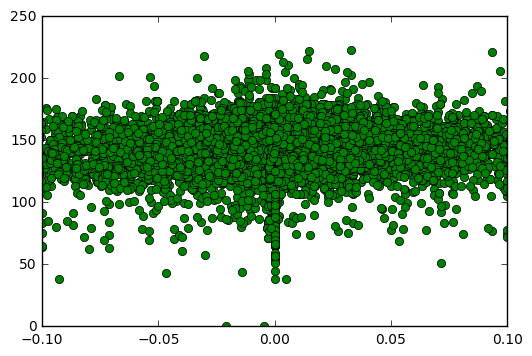

In [7]:
plt.plot(altitudeChanges, averageHRs, 'go')
plt.xlim((-0.1, 0.1))
#plt.ylim((-100, 600))
plt.show()

In [6]:
    regression = np.polyfit(altitudeChanges, averageHRs, 1)[0]
    r = np.corrcoef(altitudeChanges, averageHRs)[0,1]
    print(regression, r)

2.23352084437 0.0328622324403


In [15]:
for i in range(0, len(altitudeChanges)):
    if(abs(altitudeChanges[i]) <= 0.001):
        del altitudeChanges[i]
        del averageHRs[i]

IndexError: list index out of range

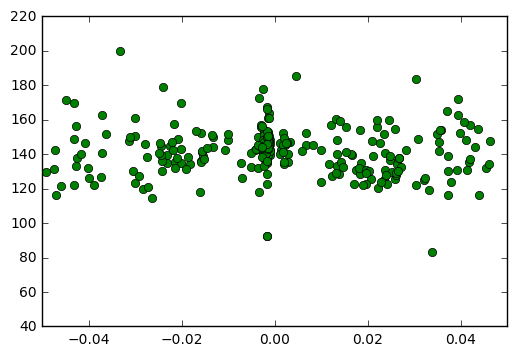

In [16]:
plt.plot(altitudeChanges, averageHRs, 'go')
plt.xlim((-0.05, 0.05))
#plt.ylim((-100, 600))
plt.show()